In [1]:
import sys
sys.path.append('../code')
from Molecular_Dynamics import make_diatomic, assign_calc, make_optimized_diatomic, generate_md_traj
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from ase import Atoms
from ase.io import read


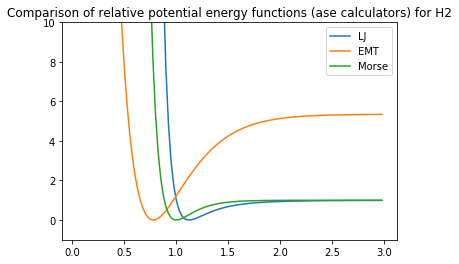

In [2]:
# Plot different potentials
pots = ["LJ", "EMT", "Morse"]
element = "H"
lengths = np.arange(.05, 3, .025)

for pot in pots:
    energies = [make_diatomic(element=element, verbose=False, 
                           bond_length=l, calc_type=pot).get_potential_energy() for l in lengths]
    energies = np.array(energies) - np.min(energies)
    plt.plot(lengths, energies, label=pot)

plt.title("Comparison of relative potential energy functions (ase calculators) for {}2".format(element))
plt.ylim(bottom= -1, top=10)
plt.legend()
plt.show()

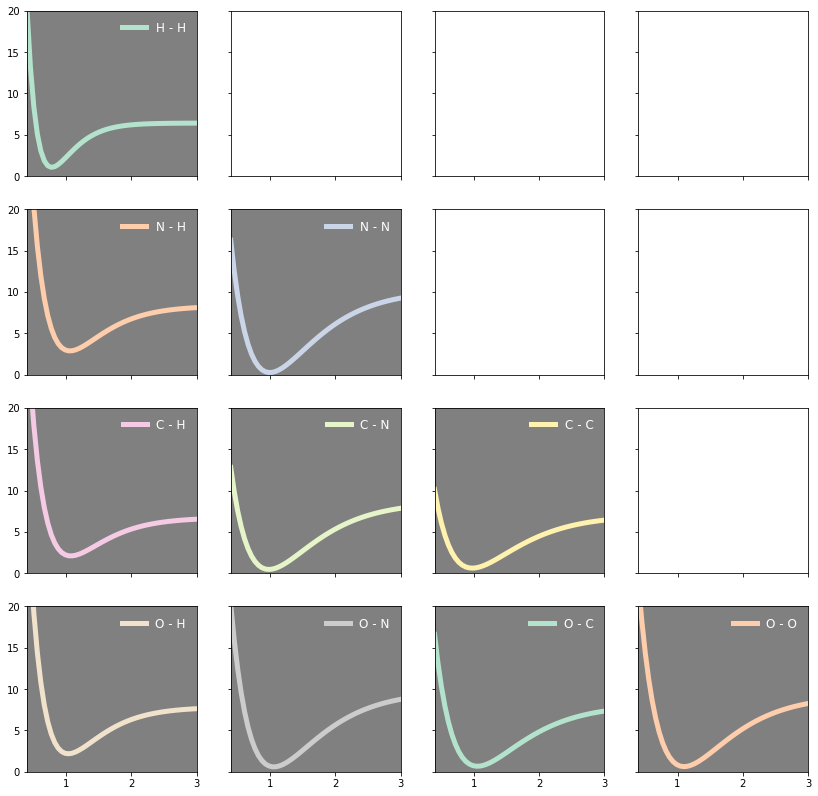

In [6]:
some_elements = ["H", "N", "C", "O"]
bond_lengths = np.linspace(.4, 3, 50)
calc_type = "EMT"
molecule_potential_energies = {}

#fig = plt.figure(figsize=(6.5,6))
fig, axs = plt.subplots(len(some_elements), len(some_elements), sharex='all', sharey='all', figsize=(14,14))
axs_flat = axs.flatten()
axs[0][0].set_ylim(bottom=0, top=20)
axs[0][0].set_yticks([0,5,10,15,20])
axs[0][0].set_xlim(left=min(bond_lengths), right=max(bond_lengths))
axs[0][0].set_xticks([1,2,3])
axs[0][0].grid(False)

palette = plt.get_cmap("Pastel2")
palette_size = len(palette.colors)
palette_itr = 0

for i in range(len(some_elements)):
    for j in range(i+1):#len(some_elements)):
        molecule_formula_i_j = some_elements[i] + some_elements[j]
        molecule_name_i_j = some_elements[i] + " - " + some_elements[j]
        energies_i_j = []
        for bond_length_k in bond_lengths:
            molecule_i_j = Atoms(molecule_formula_i_j, [(0., 0., 0.), (0., 0., bond_length_k)])
            molecule_i_j = assign_calc(molecule_i_j, calc_type)
            energy_i_j_k = molecule_i_j.get_potential_energy()
            energies_i_j.append(energy_i_j_k)
        axs[i][j].plot(bond_lengths, energies_i_j, label=molecule_name_i_j, lw=5, c=palette(palette_itr))
        palette_itr = (palette_itr + 1) % palette_size
        axs[i][j].set_facecolor("gray")
        legend_i_j = axs[i][j].legend(fontsize=12)
        legend_frame_i_j = legend_i_j.get_frame()
        legend_frame_i_j.set_linewidth(0)
        legend_frame_i_j.set_facecolor("gray")#(.9,.9,.9))
        plt.setp(legend_i_j.get_texts(), color='w')




In [7]:
OptimizedDiatomicBondLengths = {}
pots = ["LJ", "EMT", "Morse"]
elements = ["N", "H", "O"]
lengths = np.arange(.5, 3, .05)
for element in elements:
    OptimizedDiatomicBondLengths[element] = {}
    for pot in pots:
        optimized_bond_length = distance.euclidean(*make_optimized_diatomic(element=element, calc_type=pot).get_positions())
        OptimizedDiatomicBondLengths[element][pot] = optimized_bond_length
        print("Optimized bond length of {}2 using the {} potential is {:.2f} angstroms".format(element, pot, optimized_bond_length))

Optimized bond length of N2 using the LJ potential is 1.12 angstroms
Optimized bond length of N2 using the EMT potential is 1.00 angstroms
Optimized bond length of N2 using the Morse potential is 1.00 angstroms
Optimized bond length of H2 using the LJ potential is 1.12 angstroms
Optimized bond length of H2 using the EMT potential is 0.78 angstroms
Optimized bond length of H2 using the Morse potential is 1.00 angstroms
Optimized bond length of O2 using the LJ potential is 1.12 angstroms
Optimized bond length of O2 using the EMT potential is 1.10 angstroms
Optimized bond length of O2 using the Morse potential is 1.00 angstroms


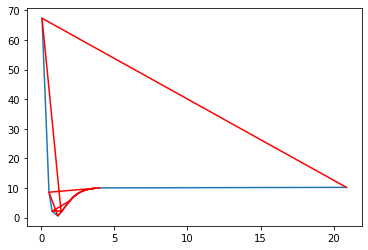

In [8]:

atoms_opt_list = make_optimized_diatomic(element="N", bond_length = 4, optimizer_type="MDMin", 
                                         optimize_step=.2, return_history=True)


dists = np.array([distance.euclidean(*atom.get_positions()) for atom in atoms_opt_list])
eners = np.array([atom.get_potential_energy() for atom in atoms_opt_list])
sorted_indices = np.argsort(dists)
plt.plot(dists[sorted_indices], eners[sorted_indices])
plt.plot(dists, eners, "r")

Nitrogen atom energy:  5.10 eV
Nitrogen molecule energy:  0.44 eV
Atomization energy:  9.76 eV
Now generating MD trajectory of 500 N₂ molecules at 300 K using VelocityVerlet dynamics
Step 100: Energy per atom: Epot = 0.161eV  Ekin = 0.084eV (T=390K) Etot = 0.245eV
Step 200: Energy per atom: Epot = 0.133eV  Ekin = 0.111eV (T=517K) Etot = 0.244eV
Step 300: Energy per atom: Epot = 0.219eV  Ekin = 0.026eV (T=123K) Etot = 0.245eV
Step 400: Energy per atom: Epot = 0.164eV  Ekin = 0.081eV (T=375K) Etot = 0.245eV
Step 500: Energy per atom: Epot = 0.132eV  Ekin = 0.112eV (T=521K) Etot = 0.244eV


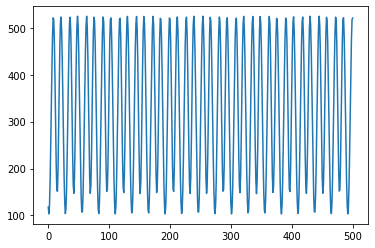

In [6]:

my_trajectory = generate_md_traj(from_diatomic=True, element = "N", nsteps=500, md_type="VelocityVerlet", time_step=1, bond_length=1.1,
                           temperature=300, verbose = True, print_step_size = 100, calc_type="EMT", preoptimize=False)




In [11]:
from Visualize_Structures import Structure3DAnimation

animation = Structure3DAnimation(my_trajectory)
animation.SetVisualParameters(adjust_COM="initial", sidelength=4, frame_rate=20, print_interval = 20, title="Trajectory of N2 molecule")
animation.Plot()

Generating animation frame 0 (0% complete)
Generating animation frame 20 (20% complete)
Generating animation frame 40 (40% complete)
Generating animation frame 60 (60% complete)
Generating animation frame 80 (80% complete)
Generating animation frame 100 (100% complete)
